# Домашнее задание №3

In [43]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

Таблица Indian liver pations records.

In [7]:
#url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Предсказать несколько элементов из таблицы с помощью метода fit и сравнить с результатом табличным.

intercept: 0.18116743679724823
slope: [0.39557996]


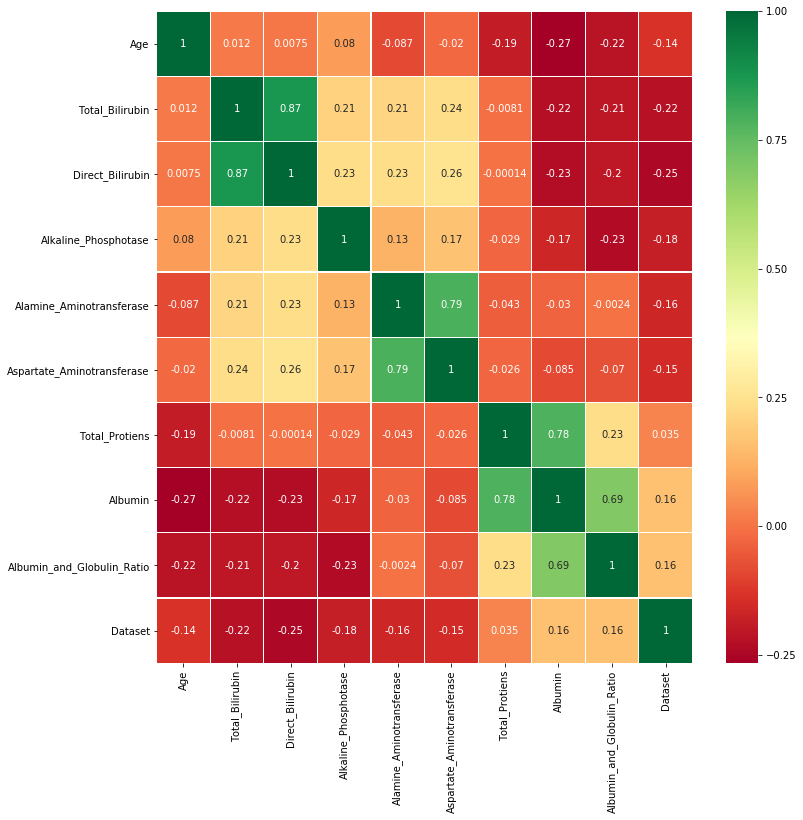

Intercept - коэффициент b, slope - коэффициент k в уравнении прямой y=kx+b
0.45807340879724934 4.49298900079725 3.068901144797249
Предсказанные результы не похожи на табличные


In [79]:
#Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. 
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Total_Bilirubin).reshape(-1,1), Direct_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

#Построить график. 
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

#Предсказать несколько элементов из таблицы с помощью метода fit и сравнить с результатом табличным.
print('Intercept - коэффициент b, slope - коэффициент k в уравнении прямой y=kx+b')
x1= 0.7
x2= 10.9
x3= 7.3
y1 = 0.39557996*x1+0.18116743679724934
y2 = 0.39557996*x2+0.18116743679724934
y3 = 0.39557996*x3+0.18116743679724934
print (y1, y2, y3)
print ('Предсказанные результы не похожи на табличные')

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

In [72]:
print('Из таблицы видно, что наиболее коррелирующие между собой параметры - Direct_Bilirubin и Total_Bilirubin, Alamine_Aminotransferase и Aspartate_Aminotransferase, Total_Protiens и Albumin')
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
Age = data['Age']
x = np.vstack([np.array(Direct_Bilirubin), np.array(Total_Bilirubin)]).T
print('x - это двумерная матрица, где колонки - это Direct_Bilirubin и Total_Bilirubin : ')
print(x[:5])
y = np.array(Age)
model = LinearRegression().fit(x, y)
print('При сравнении с таблицей видно, что какие-то данные совпали точно, какие-то - совсем не близко к реальным значениям')


Из таблицы видно, что наиболее коррелирующие между собой параметры - Direct_Bilirubin и Total_Bilirubin, Alamine_Aminotransferase и Aspartate_Aminotransferase, Total_Protiens и Albumin
x - это двумерная матрица, где колонки - это Direct_Bilirubin и Total_Bilirubin : 
[[ 0.1  0.7]
 [ 5.5 10.9]
 [ 4.1  7.3]
 [ 0.4  1. ]
 [ 2.   3.9]]
При сравнении с таблицей видно, что какие-то данные совпали точно, какие-то - совсем не близко к реальным значениям


Посчитать квартили для всех колонок. 

In [46]:
filt_data = data.loc[:, data.columns != 'Gender']
# вычисляю квартили
low = .05
mid = 0.5
high = .95
quant_data = filt_data.quantile([low, mid, high])
print (quant_data)

       Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0.05  18.0             0.60               0.1                 137.0   
0.50  45.0             1.00               0.3                 208.0   
0.95  72.0            16.35               8.4                 698.1   

      Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0.05                      15.0                        15.1            4.61   
0.50                      35.0                        42.0            6.60   
0.95                     232.0                       400.9            8.10   

      Albumin  Albumin_and_Globulin_Ratio  Dataset  
0.05     1.80                        0.50      1.0  
0.50     3.10                        0.93      1.0  
0.95     4.39                        1.50      2.0  


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать медиану и квартиль 0.5 в данных выборках. Чем они отличаются?

Медиана:  37
Квартиль 0.5 v1:  37.0
Квартиль 0.5 v2:  37.0


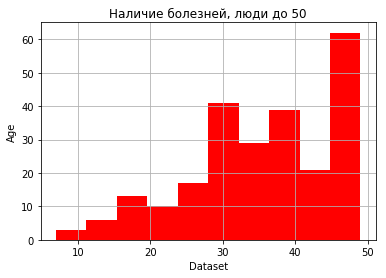

Медиана:  34.0
Квартиль 0.5:  34.0


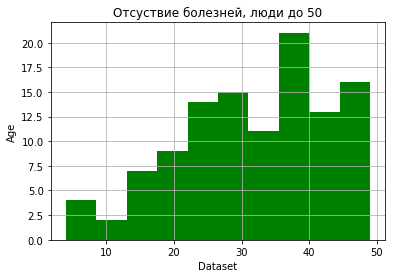

Медиана:  60.0
Квартиль 0.5:  60.0


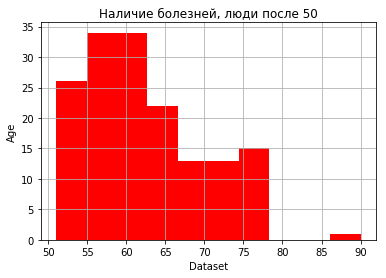

Медиана:  61
Квартиль 0.5:  61.0


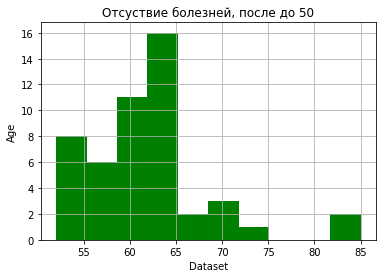

In [62]:
#Юстина, подскажите, пожалуйста, есть ли разница в вычислении квартилей первым и вторым способом?
data_filt_less50_with_deases = data[(data['Age']<50) & (data['Dataset']==1)]
print('Медиана: ', statistics.median(data_filt_less50_with_deases['Age']))
#1
print('Квартиль 0.5 v1: ', data_filt_less50_with_deases['Age'].quantile(0.5))
#2
print('Квартиль 0.5 v2: ', np.quantile(data_filt_less50_with_deases['Age'], .50))
n, bins, patches = plt.hist(data_filt_less50_with_deases['Age'], 10, facecolor='r')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.title('Наличие болезней, люди до 50')
plt.grid(True)
plt.show()

data_filt_less50_with_deases = data[(data['Age']<50) & (data['Dataset']==2)]
print('Медиана: ', statistics.median(data_filt_less50_with_deases['Age']))
print('Квартиль 0.5: ', data_filt_less50_with_deases['Age'].quantile(0.5))
n, bins, patches = plt.hist(data_filt_less50_with_deases['Age'], 10, facecolor='g')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.title('Отсуствие болезней, люди до 50')
plt.grid(True)
plt.show()

data_filt_more50_with_deases = data[(data['Age']>50) & (data['Dataset']==1)]
print('Медиана: ', statistics.median(data_filt_more50_with_deases['Age']))
print('Квартиль 0.5: ', data_filt_more50_with_deases['Age'].quantile(0.5))
n, bins, patches = plt.hist(data_filt_more50_with_deases['Age'], 10, facecolor='r')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.title('Наличие болезней, люди после 50')
plt.grid(True)
plt.show()

data_filt_more50_with_deases = data[(data['Age']>50) & (data['Dataset']==2)]
print('Медиана: ', statistics.median(data_filt_more50_with_deases['Age']))
print('Квартиль 0.5: ', data_filt_more50_with_deases['Age'].quantile(0.5))
n, bins, patches = plt.hist(data_filt_more50_with_deases['Age'], 10, facecolor='g')
plt.xlabel('Dataset')
plt.ylabel('Age')
plt.title('Отсуствие болезней, после до 50')
plt.grid(True)
plt.show()


Посчитать критерий t для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [68]:
Total_Bilirubin = data['Total_Bilirubin']
t = stats.ttest_1samp(Total_Bilirubin, data['Total_Bilirubin'].mean())
print(t)
print('p-value близко к 1, что намного больше стандартной альфа ошибки 0.05, поэтому можно считать, что выборка не похожа на генеральную совокупность.')

Ttest_1sampResult(statistic=3.4536342549372225e-15, pvalue=0.9999999999999972)
p-value близко к 1, что намного больше стандартной альфа ошибки 0.05, поэтому можно считать, что выборка не похожа на генеральную совокупность.


Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [70]:
sick = data[data['Dataset']==1]['Total_Bilirubin']
healthy = data[data['Dataset']==2]['Total_Bilirubin']
t2 = stats.ttest_ind(sick, healthy)
print(t2)
print('p-value равно намного меньше стандартной альфа ошибки 0.05, поэтому можно сказать, что группы имеют существенные различия.')

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)
p-value равно намного меньше стандартной альфа ошибки 0.05, поэтому можно сказать, что группы имеют существенные различия.


Вопросы задавать на почту yustiks@gmail.com